### Library Imports

In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import os
from itertools import zip_longest
import numpy as np

### Read Data File

In [2]:
nb_name = "1.0-jp-initial-data-exploration"

dataset_1 = 'query-sdg-full_20220313.csv' # _1, _2 etc.. as need to list more than one data set being read in

In [20]:
df = pd.read_csv('../../data/raw/'+dataset_1, sep='|', header=0) 

# Pandas will start looking from where your current python file is located. 
# Therefore you can move from your current directory to where your data is located with '..'

C:\Users\jesse\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
df.head(4)

articletype_id sdg_lst  ptr_id                  authors  \
0            13.0   14, 2      13  {"Jansen, Jonathan D."}   
1            14.0       2      14  {"Jansen, Jonathan D."}   
2            16.0       2      16  {"Jansen, Jonathan D."}   
3            17.0   14, 1      17  {"Jansen, Jonathan D."}   

                                               title  \
0  Autonomy and accountability in the regulation ...   
1                           Intellectuals under fire   
2  Mode 2 knowledge and institutional life: takin...   
3  Political symbolism as policy craft : explaini...   

                                             content  \
0  This article examines the struggles of the Sou...   
1  Looks at the status of intellectuals in South ...   
2  This paper examines the response of a black un...   
3  The policy literature in developing countries ...   

                                            keywords lang        date issn  \
0  {Autonomy,Learning,Performance,Teaching,"Gover...   en  2006-01-27  NaN   
1  {"Cultural policy",Democracy,"Political system...   en  2006-01-27  NaN   
2  {"Higher education","Information technology","...   en  2006-01-27  NaN   
3  {Apartheid,"Educational change","Educational p...   en  2006-01-28  NaN   

   doi                          handle  institution_id  \
0  NaN  http://hdl.handle.net/2263/116               1   
1  NaN  http://hdl.handle.net/2263/117               1   
2  NaN  http://hdl.handle.net/2263/119               1   
3  NaN  http://hdl.handle.net/2263/130               1   

              institution active  
0  University of Pretoria      t  
1  University of Pretoria      t  
2  University of Pretoria      t  
3  University of Pretoria      t

In [23]:
# check the types of data in the set

df.dtypes

articletype_id    float64
sdg_lst            object
ptr_id              int64
authors            object
title              object
content            object
keywords           object
lang               object
date               object
issn               object
doi                object
handle             object
institution_id      int64
institution        object
active             object
dtype: object

### Check Data Set's Quality

#### Nulls

In [24]:
# Check the number of nulls

df.isnull().sum() # Efficient query for checking the number of nulls accross columns in pandas

articletype_id         1
sdg_lst                1
ptr_id                 0
authors                0
title                  0
content               23
keywords               0
lang              122807
date                   0
issn              103329
doi               195081
handle                 0
institution_id         0
institution            0
active                 0
dtype: int64

In [25]:
# Drop na values

df = df.dropna(subset=['sdg_lst','articletype_id'])

#### ID Matches

In [26]:
# does the ptr_id and article_type_id match 

# Find the number of mismatches in id's

len([i for i in list(df.ptr_id == df.articletype_id) if i == False ])

0

#### Listed SDG's

In [27]:
# get the number different sdg's listed

listed_number = list()

zero_list = [0,0,0,0,0,0,0,0,0] # 7 zeroes to list as the maximum number of listed sdg's per article is 7

expanded_list = list()

for i in df.sdg_lst.values:

    # remove ',' in the string and split the string by white space to get a list
    
    split = [int(z)for z in i.replace(',','').split()]
    
    # replace zeroes in the zero list with corresponding entry of listed sdg on article
    # eg. [14,2] + [0,0,0,0,0,0,0] = [14,2,0,0,0,0,0] -> done for feature creation
    
    add_lists = [sum(n) for n in zip_longest(split, zero_list, fillvalue=0)]
    
    expanded_list.append(add_lists)
    
    listed_number.append(len(split))
    
print("maximum number of listed sdg's: ",max(listed_number))
    
# Get a column listing the number of sdg per article for distributional visualisation 
    
df['no_listed_sdg'] = listed_number

df[['%s_listed_sdg'%(i) for i in range(1,10)]] = pd.DataFrame(expanded_list)

maximum number of listed sdg's:  9


In [28]:
# check that 17 sdg's are represented 

np.sort(df['1_listed_sdg'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
      dtype=int64)

<IPython.core.display.Javascript object>


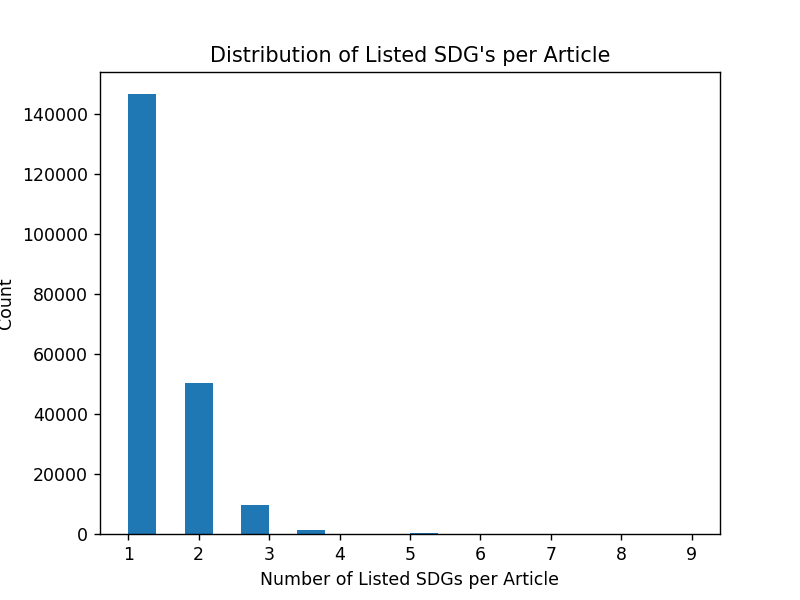

In [11]:
# visualise the distribution 

description = "Number_Listed_SDGs_per_Article" # Note the "" used here

plt.figure(1)
plt.hist(df.no_listed_sdg, bins=10, width=0.4)
plt.ylabel('Count')
plt.xlabel('Number of Listed SDGs per Article')
plt.title("Distribution of Listed SDG's per Article")
plt.savefig('../../reports/figures/exploratory_data_analysis_visualisations/[%s]-[%s]-[%s].png'%(nb_name,\
                                                                                                 dataset_1,\
                                                                                                 description))
plt.show()

<IPython.core.display.Javascript object>


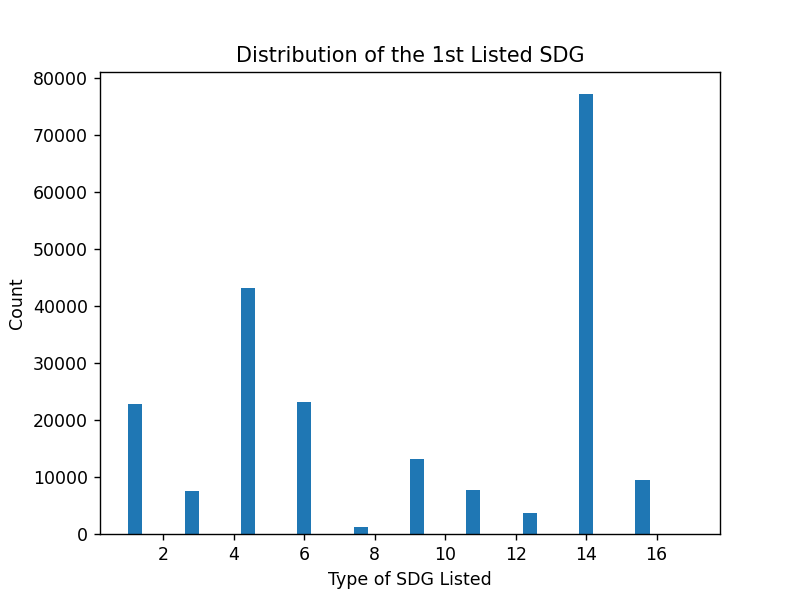

<IPython.core.display.Javascript object>


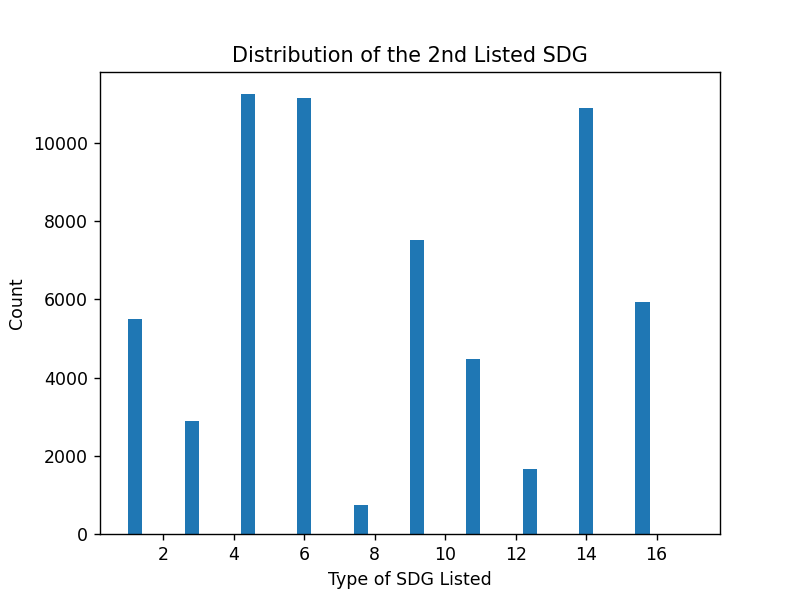

<IPython.core.display.Javascript object>


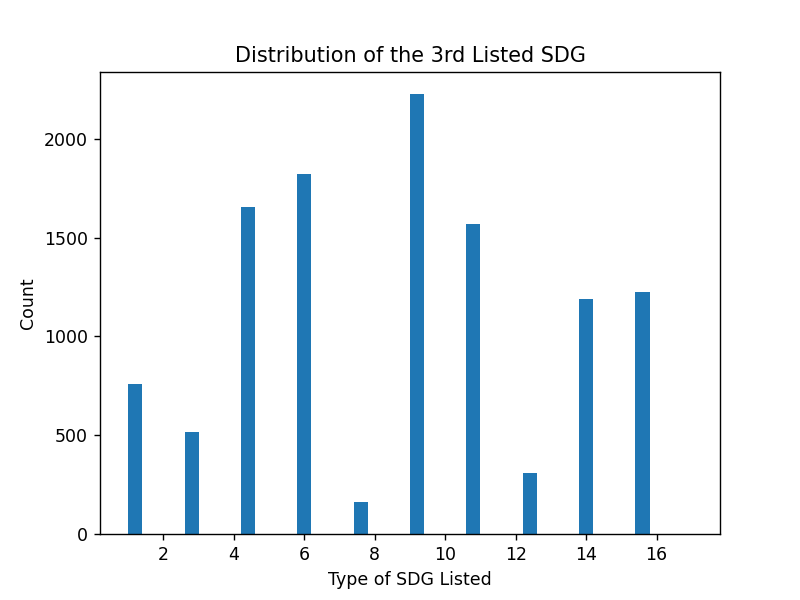

<IPython.core.display.Javascript object>


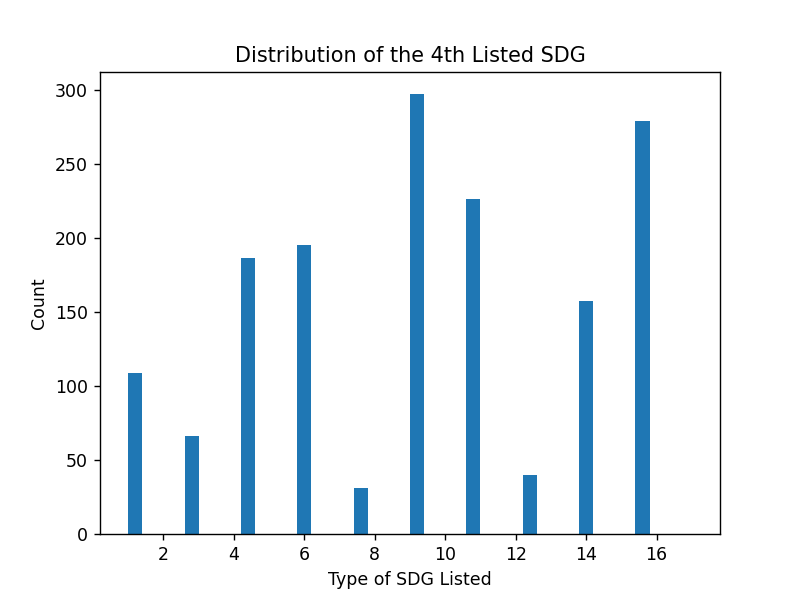

<IPython.core.display.Javascript object>


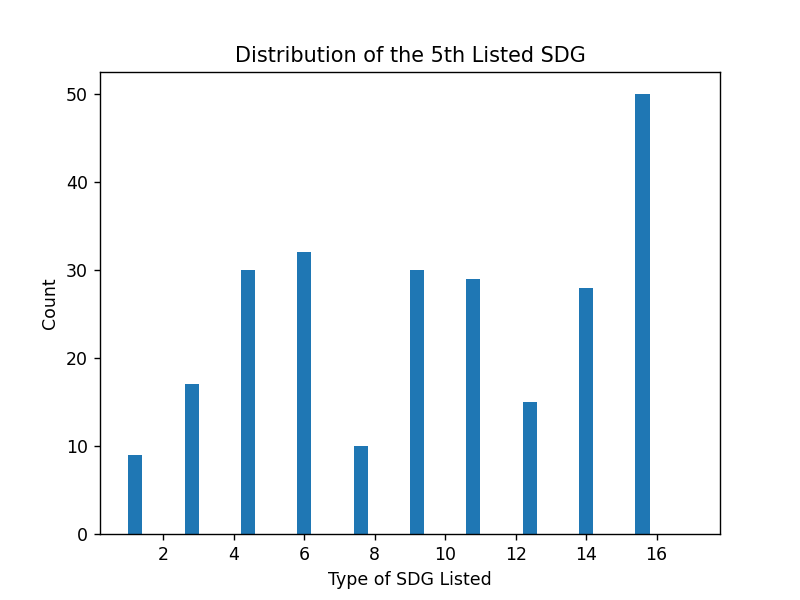

<IPython.core.display.Javascript object>


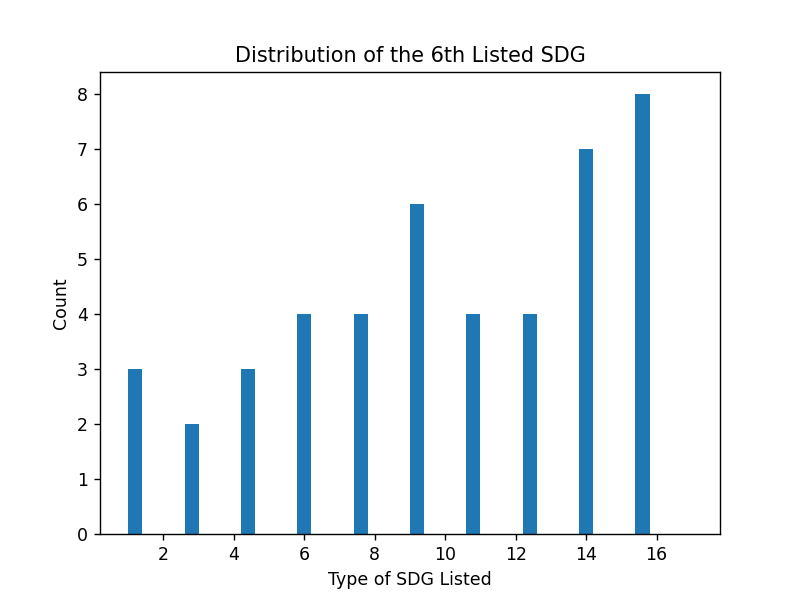

<IPython.core.display.Javascript object>


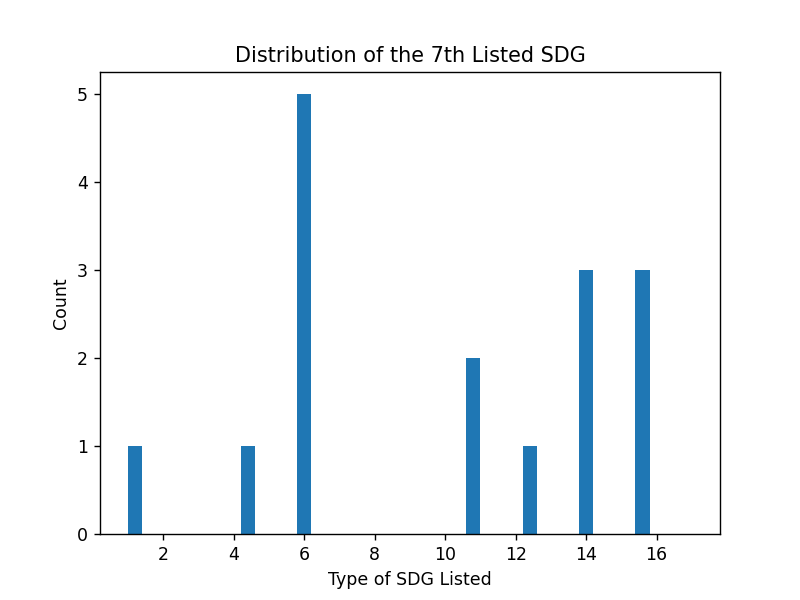

<IPython.core.display.Javascript object>


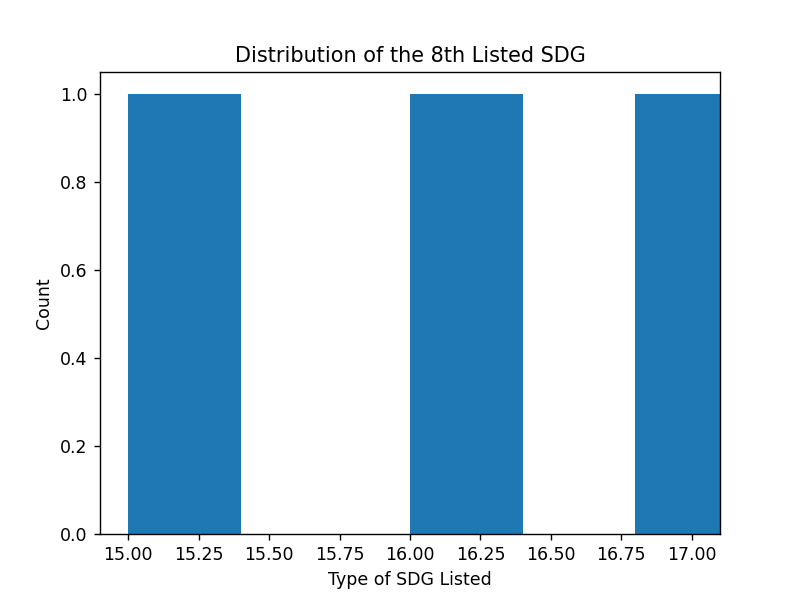

<IPython.core.display.Javascript object>


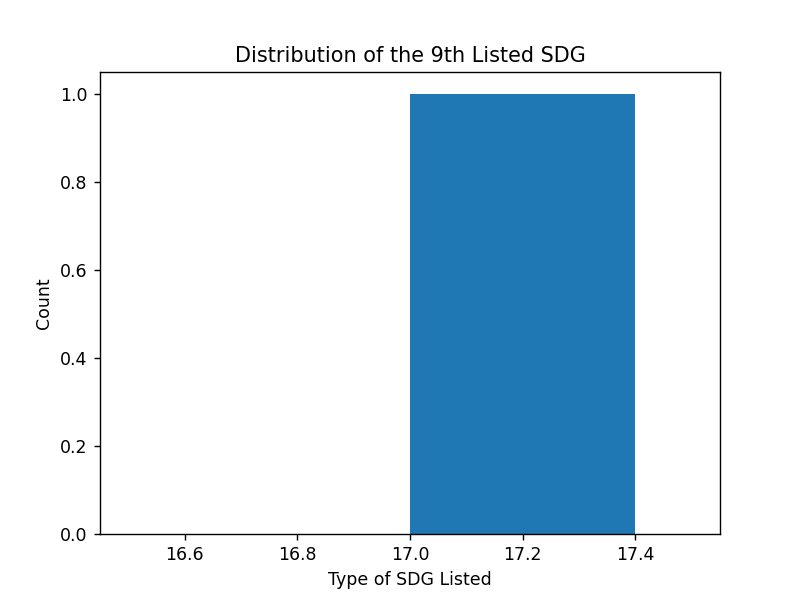

In [18]:
# visualise the distribution of each listed SDG 

dct = {1:'st',2:'nd',3:'rd',4:'th',5:'th',6:'th',7:'th',8:'th',9:'th'}

for i in range(1,10):

    description = "Distribution of the %s%s Listed SDG"%(i,dct[i]) # Note the "" used here
    
    plt.figure(1+i)
    plt.hist(df[df['%s_listed_sdg'%(i)]!=0]['%s_listed_sdg'%(i)], width=0.4)
    plt.ylabel('Count')
    plt.xlabel('Type of SDG Listed')
    plt.title(description)
#     plt.savefig('../../reports/figures/exploratory_data_analysis_visualisations/[%s]-[%s]-[%s].png'%(nb_name,\
#                                                                                                      dataset_1,\
#                                                                                                      description))
    plt.show()